In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np

def process_flow_rate(file_path, feature_name, field_name, matrix_field=True, max_time_steps=181, preprocess=None):
    """
    Load and process a flow rate .mat file to extract data for the specified field in a feature.
    Args:
        file_path (str): Path to the .mat file.
        feature_name (str): Name of the feature to extract (e.g., 'WaterTrack').
        field_name (str): Name of the field within the feature (e.g., 'Vel_StdDev').
        matrix_field (bool): Whether the field is a matrix requiring mean calculation.
        max_time_steps (int): Maximum number of time steps to return.
        preprocess (callable): Optional preprocessing function to apply to the field data.
    Returns:
        np.ndarray: Extracted values for the specified field (processed if matrix_field=True).
    """
    try:
        # Load the MATLAB file
        matlab_data = loadmat(file_path, struct_as_record=False, squeeze_me=True)
        
        # Extract the feature data
        struct_data = matlab_data[feature_name]
        field_data = getattr(struct_data, field_name)  # Dynamically access the field
        
        if preprocess is not None:
            # Apply preprocessing function if provided
            field_data = preprocess(field_data)
        
        if matrix_field:
            # Compute mean values for each time step (if it's a matrix)
            processed_data = np.nanmean(field_data, axis=(0, 1))  # Mean over rows and columns
        else:
            # Directly use the field data if it's scalar
            processed_data = field_data
        
        return processed_data[:max_time_steps]  # Limit to max_time_steps if necessary
    
    except Exception as e:
        print(f"Error processing {file_path} ({field_name}): {e}")
        return None

# Define preprocessing function for Bottom Track Velocity
def preprocess_bottom_track(data):
    # Replace negative values with zero
    data[data < 0] = 0
    # Compute the average of the four columns
    averaged_data = np.nanmean(data, axis=1)  # Average across columns
    return averaged_data



# Define file paths for the field data
file_paths = {
    # January 2023 Data
    'Transect_01_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20230118103246.mat',
    'Transect_02_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20230118104553.mat',
    'Transect_03_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20230118105035.mat',
    'Transect_04_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20230118105343.mat',
    'Transect_05_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20230118105633.mat',
    'Transect_06_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20230118110009.mat',

    # June 2023 Data
    'Transect_01_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20230607123907.mat',
    'Transect_02_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20230607125347.mat',
    'Transect_03_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20230607125734.mat',
    'Transect_04_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20230607130155.mat',
    'Transect_05_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20230607130606.mat',

    # August 2023 Data
    'Transect_01_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_202308190806.mat',
    'Transect_02_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_202308191441.mat',
    'Transect_03_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_202308191758.mat',
    'Transect_04_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_202308192055.mat',
    'Transect_05_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_202308192351.mat',

    # August 2023 (Second Dataset)
    'Transect_01_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_2023082916300.mat',
    'Transect_02_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_2023082916347.mat',
    'Transect_03_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20230829163132.mat',
    'Transect_04_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20230829164057.mat',
    'Transect_05_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20230829165037.mat',
    'Transect_06_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20230829170426.mat',
    'Transect_07_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20230829171342.mat',
    'Transect_08_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\08-Transect_20230829172530.mat',

    # October 2023 Data
    'Transect_01_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20231027121112.mat',
    'Transect_02_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20231027122752.mat',
    'Transect_03_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20231027123056.mat',
    'Transect_04_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20231027123404.mat',
    'Transect_05_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20231027123719.mat',
    'Transect_06_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20231027124040.mat',
    'Transect_07_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20231027124401.mat',
    'Transect_08_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\08-Transect_20231027124713.mat',

    # December 2023 Data
    'Transect_01_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20231211093536.mat',
    'Transect_02_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20231211093916.mat',
    'Transect_03_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20231211094331.mat',
    'Transect_04_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20231211094620.mat',
    'Transect_05_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20231211094909.mat',
    'Transect_06_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20231211095515.mat',
    'Transect_07_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20231211095900.mat',

    # January 2024 Data
    'Transect_01_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20240103121207.mat',
    'Transect_02_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20240103121450.mat',
    'Transect_03_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20240103121651.mat',
    'Transect_04_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20240103121856.mat',
    'Transect_05_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20240103122100.mat',
    'Transect_06_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20240103122302.mat',
    'Transect_07_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20240103122612.mat',
}


# Define features and their corresponding fields
features_to_extract = {
    'WaterTrack': {'matrix': ['Vel_StdDev', 'Correlation', 'Vel_Expected_StdDev']},  # Matrix-based features
    'Summary': {'scalar': ['Mean_Speed', 'Depth']},  # Scalar features
    'System': {'matrix': ['SNR'], 'scalar': ['Cell_Size', 'Cell_Start']},
    'BottomTrack': {'scaler': ['BT_Vel']}  # Bottom track velocity (requires preprocessing)
}


# Process each file for all features
processed_data = {}

for label, path in file_paths.items():
    processed_data[label] = {}
    for feature_name, field_groups in features_to_extract.items():
        for field_type, fields in field_groups.items():
            for field_name in fields:
                print(f"Processing {label} - {feature_name} ({field_name})...")
                
                # Apply preprocessing for BottomTrack > BT_Vel
                preprocess = preprocess_bottom_track if feature_name == 'BottomTrack' and field_name == 'BT_Vel' else None
                
                matrix_field = (field_type == 'matrix')  # Determine if it's matrix or scalar
                key = f"{feature_name}_{field_name}"  # Unique key for each feature-field combo
                processed_data[label][key] = process_flow_rate(path, feature_name, field_name, matrix_field, preprocess=preprocess)



Processing Transect_01_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_01_20230118 - WaterTrack (Correlation)...
Processing Transect_01_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_01_20230118 - Summary (Mean_Speed)...
Processing Transect_01_20230118 - Summary (Depth)...
Processing Transect_01_20230118 - System (SNR)...
Processing Transect_01_20230118 - System (Cell_Size)...
Processing Transect_01_20230118 - System (Cell_Start)...
Processing Transect_01_20230118 - BottomTrack (BT_Vel)...
Processing Transect_02_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_02_20230118 - WaterTrack (Correlation)...
Processing Transect_02_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_02_20230118 - Summary (Mean_Speed)...
Processing Transect_02_20230118 - Summary (Depth)...
Processing Transect_02_20230118 - System (SNR)...


C:\Users\thtuh\AppData\Local\Temp\ipykernel_8180\2699648799.py:32: RuntimeWarning: Mean of empty slice
  processed_data = np.nanmean(field_data, axis=(0, 1))  # Mean over rows and columns


Processing Transect_02_20230118 - System (Cell_Size)...
Processing Transect_02_20230118 - System (Cell_Start)...
Processing Transect_02_20230118 - BottomTrack (BT_Vel)...
Processing Transect_03_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_03_20230118 - WaterTrack (Correlation)...
Processing Transect_03_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_03_20230118 - Summary (Mean_Speed)...
Processing Transect_03_20230118 - Summary (Depth)...
Processing Transect_03_20230118 - System (SNR)...
Processing Transect_03_20230118 - System (Cell_Size)...
Processing Transect_03_20230118 - System (Cell_Start)...
Processing Transect_03_20230118 - BottomTrack (BT_Vel)...
Processing Transect_04_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_04_20230118 - WaterTrack (Correlation)...
Processing Transect_04_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_04_20230118 - Summary (Mean_Speed)...
Processing Transect_04_20230118 - Summary (Depth)...


In [2]:
# Initialize lists for DataFrame content
final_data = []
# List of features to check
features_to_check = ['BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation','Mean_Speed', 'SNR', 'Vel_Expected_StdDev']
# Iterate through processed data for all transects and features
for label, features in processed_data.items():
    for i in range(181):  # Assuming each transect has up to 181 time steps
        row = {"Transect": label}  # Add the transect label (renamed from "Flow Rate")
        for key, values in features.items():
            if values is not None and len(values) > i:
                feature_name = key.split('_', 1)[1]  # Keep the full feature name after the first underscore
                row[feature_name] = values[i]
        final_data.append(row)

# Convert to DataFrame
final_df = pd.DataFrame(final_data)

# Reorder columns to place 'Transect' first
columns = ["Transect"] + [feature for feature in features_to_check]  # Ensure consistent column order
final_df = final_df[columns]  # Reorder columns

# Save DataFrame to an Excel file
output_path = r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_1.xlsx"  # Updated file name for field data
final_df.to_excel(output_path, index=False)
print(f"Data saved to {output_path}")

# Verify DataFrame contents
print(final_df.head())

Data saved to C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_1.xlsx
               Transect    BT_Vel     Depth  Vel_StdDev  Correlation  \
0  Transect_01_20230118  0.002594  0.630651         0.0    76.583333   
1  Transect_01_20230118  0.000000  0.625413         0.0    76.583333   
2  Transect_01_20230118  0.002833  0.619808         0.0    77.200000   
3  Transect_01_20230118  0.000784  0.617424         0.0    75.443510   
4  Transect_01_20230118  0.002963  0.613901         0.0    76.750000   

   Mean_Speed        SNR  Vel_Expected_StdDev  
0    0.176239  36.506061             0.000765  
1    0.149039  37.350000             0.000746  
2    0.172903  36.171875             0.000753  
3    0.155965  13.624772             0.006910  
4    0.151861  36.903333             0.000780  


In [3]:
# Initialize lists for DataFrame content
final_data = []

# Acoustic attenuation for ABS calculation
alpha = 0.07

# List of features to check (explicitly including Bin_Distance and Relative_ABS)
features_to_check = ['BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation',
                     'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 
                     'Bin_Distance', 'Relative_ABS']

# Iterate through processed data for all transects and features
for label, features in processed_data.items():
    
    # Dynamically determine the smallest available data length (avoid empty iterable issue)
    num_steps = min((len(v) for v in features.values() if v is not None and len(v) > 0), default=0)

    if num_steps == 0:  # Skip this transect if no valid data exists
        print(f"Skipping {label} due to missing data.")
        continue  

    for i in range(num_steps):  # Dynamically adjusted loop length
        row = {"Transect": label}
        
        # Add existing features
        for key, values in features.items():
            if values is not None and len(values) > i:
                feature_name = key.split('_', 1)[1]
                row[feature_name] = values[i]
        
        # Explicitly calculate Bin Distance & Relative ABS (if available)
        if ('System_Cell_Start' in features and 
            'System_Cell_Size' in features and 
            'System_SNR' in features and
            len(features['System_Cell_Start']) > i and
            len(features['System_Cell_Size']) > i and
            len(features['System_SNR']) > i):
            
            bin_distance = features['System_Cell_Start'][i] + (features['System_Cell_Size'][i] / 2)
            row['Bin_Distance'] = bin_distance

            snr_value = features['System_SNR'][i]
            row['Relative_ABS'] = snr_value + 20 * np.log10(bin_distance) + 2 * alpha * bin_distance
        
        final_data.append(row)

# Convert to DataFrame
final_df = pd.DataFrame(final_data)

# Explicitly reorder columns
columns = ["Transect"] + [feature for feature in features_to_check if feature in final_df.columns]
final_df = final_df[columns]

# Save to Excel explicitly
output_path = r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_with_ABS.xlsx"
final_df.to_excel(output_path, index=False)

# Quick verification
print(final_df.head())
print(f"Data saved successfully to {output_path}")

Skipping Transect_02_20230607 due to missing data.
Skipping Transect_01_20230819 due to missing data.
Skipping Transect_02_20230819 due to missing data.
Skipping Transect_03_20230819 due to missing data.
Skipping Transect_04_20230819 due to missing data.
Skipping Transect_05_20230819 due to missing data.
Skipping Transect_01_20230829 due to missing data.
Skipping Transect_02_20230829 due to missing data.
               Transect    BT_Vel     Depth  Vel_StdDev  Correlation  \
0  Transect_01_20230118  0.002594  0.630651         0.0    76.583333   
1  Transect_01_20230118  0.000000  0.625413         0.0    76.583333   
2  Transect_01_20230118  0.002833  0.619808         0.0    77.200000   
3  Transect_01_20230118  0.000784  0.617424         0.0    75.443510   
4  Transect_01_20230118  0.002963  0.613901         0.0    76.750000   

   Mean_Speed        SNR  Vel_Expected_StdDev  Bin_Distance  Relative_ABS  
0    0.176239  36.506061             0.000765      0.143333     19.653044  
1    0.

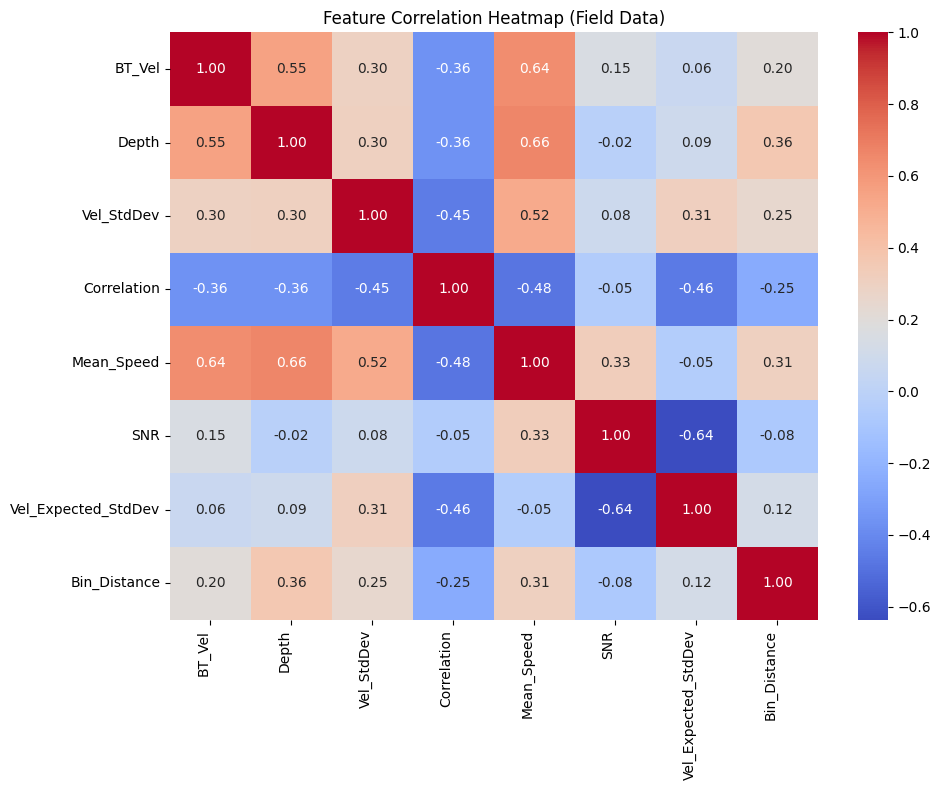

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed Excel file
input_path =  r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_with_ABS.xlsx"
final_df.to_excel(output_path, index=False)
final_df = pd.read_excel(input_path)

# List of features to check (Modify this to add/remove features dynamically)
features_to_check = [
    'BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation', 
    'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 
    'Bin_Distance'
]

# Ensure selected features exist in the DataFrame
available_features = [feature for feature in features_to_check if feature in final_df.columns]

# Exclude the 'Flow Rate' column and select only available features
features_only_df = final_df[available_features]

# Calculate the correlation matrix
correlation_matrix = features_only_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Feature Correlation Heatmap (Field Data)")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Cross-Validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.base import clone

# === Load and preprocess dataset ===
output_path = r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_with_ABS.xlsx"
lab_data = pd.read_excel(output_path)

# Define features
numeric_features = ['BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 
                    'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
lab_data_numeric = lab_data[numeric_features].fillna(lab_data[numeric_features].mean(numeric_only=True))

X = lab_data_numeric.drop(columns=['BT_Vel'])
y = lab_data_numeric['BT_Vel'].fillna(lab_data_numeric['BT_Vel'].mean())

# === Bin target for stratified sampling ===
n_bins = 10
binner = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_binned = binner.fit_transform(y.values.reshape(-1, 1)).ravel()

# === Define stratified cross-validation ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Define models ===
models = {
    #"Linear Regression": LinearRegression(),
    #"Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    #"SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1),
    "LightGBM": LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "Stacking Regressor": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(random_state=42)),
            ('gb', GradientBoostingRegressor(random_state=42))
        ],
        final_estimator=GradientBoostingRegressor(random_state=42)
    )
}

# === Run cross-validation ===
cv_results = []

for name, model in models.items():
    print(f"\nCross-validating: {name}")
    r2_scores = []
    mse_scores = []

    try:
        for train_idx, test_idx in skf.split(X, y_binned):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            pipeline = make_pipeline(StandardScaler(), clone(model))
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            r2_scores.append(r2_score(y_test, y_pred))
            mse_scores.append(mean_squared_error(y_test, y_pred))

        cv_results.append({
            "Model": name,
            "Mean R²": np.mean(r2_scores),
            "Std R²": np.std(r2_scores),
            "Mean MSE": np.mean(mse_scores),
            "Std MSE": np.std(mse_scores)
        })

    except Exception as e:
        print(f"⚠️ Model {name} failed during cross-validation: {e}")
        cv_results.append({
            "Model": name,
            "Mean R²": np.nan,
            "Std R²": np.nan,
            "Mean MSE": np.nan,
            "Std MSE": np.nan
        })

# === Output final results ===
cv_results_df = pd.DataFrame(cv_results).sort_values(by="Mean R²", ascending=False)
pd.set_option('display.max_rows', None)
print("\n✅ Cross-Validation Results (All Models):")
print(cv_results_df)



Cross-validating: Random Forest

Cross-validating: Gradient Boosting

Cross-validating: XGBoost

Cross-validating: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 4756, number of used features: 7
[LightGBM] [Info] Start training from score 0.021105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 4756, number of used features: 7
[LightGBM] [Info] Start training from score 0.021127


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 4756, number of used features: 7
[LightGBM] [Info] Start training from score 0.021112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 4756, number of used features: 7
[LightGBM] [Info] Start training from score 0.020997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 4756, number of used features: 7
[LightGBM] [Info] Start training 

Updated code 28 August (Split_Validation)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np

# Load dataset
# output_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_1.xlsx'
output_path = r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_with_ABS.xlsx"
lab_data = pd.read_excel(output_path)

# Feature selection and preprocessing
numeric_features = ['BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation','Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']

missing_cols = [col for col in numeric_features if col not in lab_data.columns]
if missing_cols:
    raise ValueError(f"Missing columns in dataset: {missing_cols}")

lab_data_numeric = lab_data[numeric_features].copy()

# Handle missing values
lab_data_numeric = lab_data_numeric.fillna(lab_data_numeric.mean(numeric_only=True))

# Separate features and target
X = lab_data_numeric.drop(columns=['BT_Vel'])
y = lab_data_numeric['BT_Vel'].fillna(lab_data_numeric['BT_Vel'].mean())

# Train/test split (then scale to avoid leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train only
X_test_scaled  = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1),
    "LightGBM": LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "Stacking Regressor": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(random_state=42)),
            ('gb', GradientBoostingRegressor(random_state=42))
        ],
        final_estimator=GradientBoostingRegressor(random_state=42)
    )
}

# Train and evaluate
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)           # use scaled features
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R²": r2})

# Display results
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 4756, number of used features: 7
[LightGBM] [Info] Start training from score 0.021242
Training CatBoost...
Training Stacking Regressor...

Model Performance Comparison:
                Model       MSE        R²
0       Random Forest  0.000247  0.573207
4            CatBoost  0.000255  0.558164
5  Stacking Regressor  0.000256  0.557118
3            LightGBM  0.000265  0.541477
2             XGBoost  0.000265  0.540820
1   Gradient Boosting  0.000280  0.515387



Computing SHAP values for Random Forest...

Computing SHAP values for Gradient Boosting...

Computing SHAP values for XGBoost...

Computing SHAP values for LightGBM...

Computing SHAP values for CatBoost...

Computing SHAP values for Stacking Regressor...
Skipping SHAP for Stacking Regressor due to: Model type not yet supported by TreeExplainer: <class 'sklearn.ensemble._stacking.StackingRegressor'>


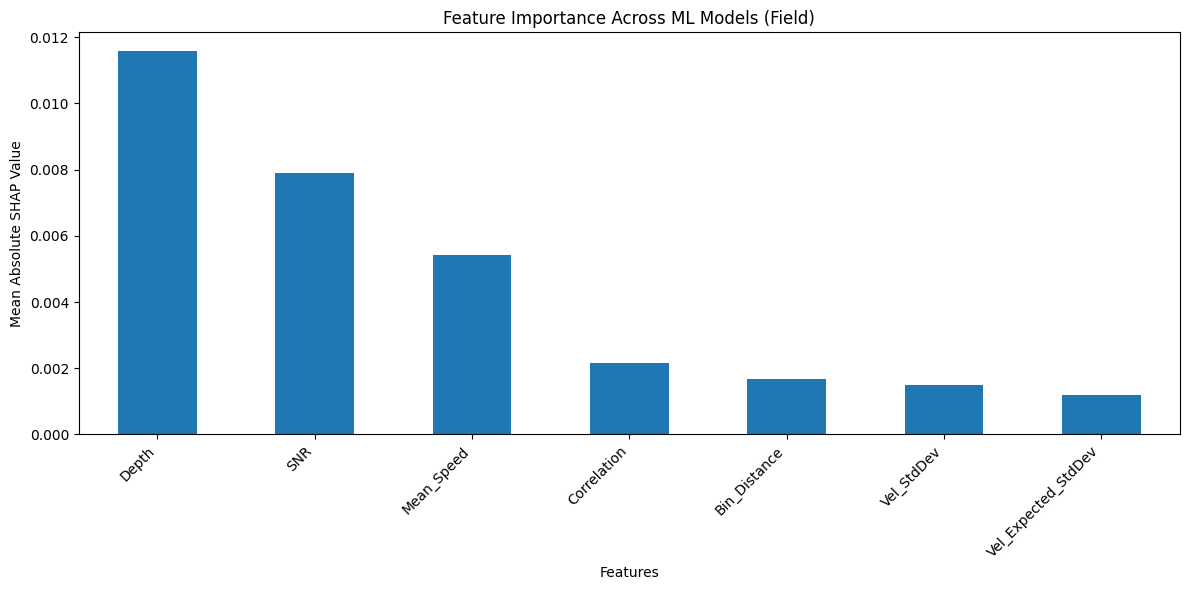

In [6]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Compute Feature Importance using SHAP for All Models
feature_importance = {}

for name, model in models.items():
    print(f"\nComputing SHAP values for {name}...")
    try:
        if name in ["Random Forest", "Gradient Boosting", "Stacking Regressor","XGBoost", "LightGBM", "CatBoost"]:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
        else:
            explainer = shap.KernelExplainer(model.predict, X_train[:50])  # Approximate method for non-tree models
            shap_values = explainer.shap_values(X_test[:50])  # Subset for performance

        # Compute mean absolute SHAP values for each feature
        mean_shap_values = np.abs(shap_values).mean(axis=0)
        feature_importance[name] = mean_shap_values

    except Exception as e:
        print(f"Skipping SHAP for {name} due to: {str(e)}")

# Convert feature importance into a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, index=X_test.columns)
feature_importance_df = feature_importance_df.mean(axis=1).sort_values(ascending=False)

# Plot Feature Importance for all models in one figure
plt.figure(figsize=(12, 6))
feature_importance_df.plot(kind='bar')
plt.title('Feature Importance Across ML Models (Field)')
plt.ylabel('Mean Absolute SHAP Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()